Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6370
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7890
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8740
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.9040
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9340
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.9550
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2204 - accuracy: 0.9570
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9640
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9520
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9580
Epoch 11/100
20/20 [=

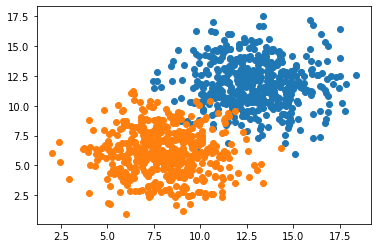

In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), 
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T #Labels
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])



model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1) #lr = learning rate
# binary classification -> binary_crossentropy
# 3 or more classes     -> categoricat_crossentropy
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
#.fit() trains the model 
# x=Data, y=Labels, 
# verbose=Shows training progress, 
# epoch=Whenever the it iterates over all the dataset of point and labels
# batch_size=creates multiple smaller batches for each epoch
# shuffle= shuffles the dataset to prevent local minimun error.

#Overfitting: Good performance on the training data, poor generliazation to other data. 
#Underfitting: Poor performance on the training data and poor generalization to other data
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=100, shuffle='true')

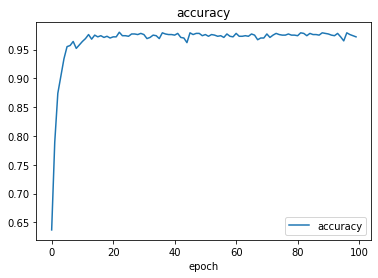

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [ ]:
def plot_decision_boundary(X, y, model):
    # -1 & +1 will create a tolerance which will improve the visualization of the grid  

    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

prediction is:  [[0.99981815]]


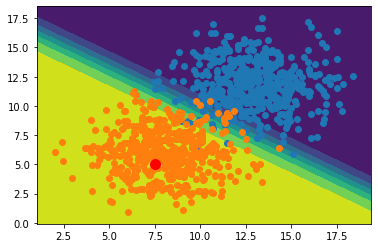

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)